## **Introduction**
Overview
This dataset simulates realistic Unified Payments Interface (UPI) transactions across various merchant categories in India. It is designed to reflect real-world digital payment patterns, including temporal, demographic, and behavioral features relevant for fraud detection, consumer analytics, and business intelligence.

## Business Problem
Online transactions suffer from fraudulent activities leading to financial losses.
The objective is to build a machine learning model that can accurately detect
fraudulent transactions in real time while minimizing false positives.

## Dataset Overview
- Rows: 250000
- Target Variable: fraud_flag


## **Loading the Dataset**

In [121]:
import pandas as pd
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
DATA_PATH = PROJECT_ROOT / "data" / "raw" / "upi_fraud_dataset.csv"
assert DATA_PATH.exists(), f"Dataset not found at {DATA_PATH}"

df = pd.read_csv(DATA_PATH, encoding="utf-8")



In [122]:
# copy the dataset
df = df.copy()

In [123]:
df.head()          
print("shape:", df.shape)


shape: (250000, 17)


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-null  object
 16  is

In [125]:
# checking missing valeus
df.isnull().sum()

transaction id        0
timestamp             0
transaction type      0
merchant_category     0
amount (INR)          0
transaction_status    0
sender_age_group      0
receiver_age_group    0
sender_state          0
sender_bank           0
receiver_bank         0
device_type           0
network_type          0
fraud_flag            0
hour_of_day           0
day_of_week           0
is_weekend            0
dtype: int64

In [126]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [130]:
display(df.head(), df.tail())

transaction id            timestamp transaction type merchant_category  \
0  TXN0000000001  2024-10-08 15:17:28              P2P     Entertainment   
1  TXN0000000002  2024-04-11 06:56:00              P2M           Grocery   
2  TXN0000000003  2024-04-02 13:27:18              P2P           Grocery   
3  TXN0000000004  2024-01-07 10:09:17              P2P              Fuel   
4  TXN0000000005  2024-01-23 19:04:23              P2P          Shopping   

   amount (INR) transaction_status sender_age_group receiver_age_group  \
0           868            SUCCESS            26-35              18-25   
1          1011            SUCCESS            26-35              26-35   
2           477            SUCCESS            26-35              36-45   
3          2784            SUCCESS            26-35              26-35   
4           990            SUCCESS            26-35              18-25   

    sender_state sender_bank receiver_bank device_type network_type  \
0          Delhi        Axis           SBI     Android           4G   
1  Uttar Pradesh       ICICI          Axis         iOS           4G   
2      Karnataka    Yes Bank           PNB     Android           4G   
3          Delhi       ICICI           PNB     Android           5G   
4          Delhi        Axis      Yes Bank         iOS         WiFi   

   fraud_flag  hour_of_day day_of_week  is_weekend  
0           0           15     Tuesday           0  
1           0            6    Thursday           0  
2           0           13     Tuesday           0  
3           0           10      Sunday           1  
4           0           19     Tuesday           0

transaction id            timestamp transaction type merchant_category  \
249995  TXN0000249996  2024-11-08 22:41:43         Recharge              Food   
249996  TXN0000249997  2024-12-15 02:58:03              P2P         Utilities   
249997  TXN0000249998  2024-11-27 16:33:25              P2P              Food   
249998  TXN0000249999  2024-01-05 13:31:30         Recharge        Healthcare   
249999  TXN0000250000  2024-01-17 15:23:07              P2P     Entertainment   

        amount (INR) transaction_status sender_age_group receiver_age_group  \
249995           373            SUCCESS            36-45              26-35   
249996          2025            SUCCESS            36-45              26-35   
249997           468            SUCCESS            26-35              18-25   
249998           284            SUCCESS            18-25              36-45   
249999           531            SUCCESS            18-25              26-35   

          sender_state sender_bank receiver_bank device_type network_type  \
249995       Telangana       ICICI          HDFC         iOS           5G   
249996       Rajasthan        HDFC      Yes Bank     Android           5G   
249997     West Bengal       ICICI         ICICI     Android           4G   
249998  Andhra Pradesh        Axis         ICICI         iOS           4G   
249999       Telangana        Axis      Yes Bank     Android           4G   

        fraud_flag  hour_of_day day_of_week  is_weekend  
249995           0           22      Friday           0  
249996           0            2      Sunday           1  
249997           0           16   Wednesday           0  
249998           0           13      Friday           0  
249999           0           15   Wednesday           0

In [128]:
# statistical analysis
df.describe().T

count         mean          std   min    25%    50%     75%  \
amount (INR)  250000.0  1311.756036  1848.059224  10.0  288.0  629.0  1596.0   
fraud_flag    250000.0     0.001920     0.043776   0.0    0.0    0.0     0.0   
hour_of_day   250000.0    14.681032     5.188304   0.0   11.0   15.0    19.0   
is_weekend    250000.0     0.285348     0.451581   0.0    0.0    0.0     1.0   

                  max  
amount (INR)  42099.0  
fraud_flag        1.0  
hour_of_day      23.0  
is_weekend        1.0

In [ ]:
from scipy.stats import skew, kurtosis

def better_summary(df):
    summary_data = []

    for col in df.columns:
        col_data = df[col]
        col_summary = {
            "Column": col,
            "Data Type": col_data.dtype,
            "Non-Null Count": col_data.notnull().sum(),
            "Missing Count": col_data.isnull().sum(),
            "Missing %": col_data.isnull().mean() * 100,
            "Unique Count": col_data.nunique()}

        if pd.api.types.is_numeric_dtype(col_data):
            col_summary.update({
                "Min": col_data.min(),
                "Max": col_data.max(),
                "Mean": col_data.mean(),
                "Median": col_data.median(),
                "Std Dev": col_data.std(),
                "Skewness": skew(col_data.dropna()),
                "Kurtosis": kurtosis(col_data.dropna())})
        else:
            mode = col_data.mode().iloc[0] if not col_data.mode().empty else np.nan
            mode_freq = col_data.value_counts().iloc[0] if not col_data.value_counts().empty else np.nan
            col_summary.update({
                "Top (Mode)": mode,
                "Freq": mode_freq})

        summary_data.append(col_summary)

    return pd.DataFrame(summary_data)

summary = better_summary(df)
summary

Column Data Type  Non-Null Count  Missing Count  Missing %  \
0       transaction id    object          250000              0        0.0   
1            timestamp    object          250000              0        0.0   
2     transaction type    object          250000              0        0.0   
3    merchant_category    object          250000              0        0.0   
4         amount (INR)     int64          250000              0        0.0   
5   transaction_status    object          250000              0        0.0   
6     sender_age_group    object          250000              0        0.0   
7   receiver_age_group    object          250000              0        0.0   
8         sender_state    object          250000              0        0.0   
9          sender_bank    object          250000              0        0.0   
10       receiver_bank    object          250000              0        0.0   
11         device_type    object          250000              0        0.0   
12        network_type    object          250000              0        0.0   
13          fraud_flag     int64          250000              0        0.0   
14         hour_of_day     int64          250000              0        0.0   
15         day_of_week    object          250000              0        0.0   
16          is_weekend     int64          250000              0        0.0   

    Unique Count           Top (Mode)      Freq   Min      Max         Mean  \
0         250000        TXN0000000001       1.0   NaN      NaN          NaN   
1         248610  2024-05-16 20:14:31       3.0   NaN      NaN          NaN   
2              4                  P2P  112445.0   NaN      NaN          NaN   
3             10              Grocery   49966.0   NaN      NaN          NaN   
4          10355                  NaN       NaN  10.0  42099.0  1311.756036   
5              2              SUCCESS  237624.0   NaN      NaN          NaN   
6              5                26-35   87432.0   NaN      NaN          NaN   
7              5                26-35   87864.0   NaN      NaN          NaN   
8             10          Maharashtra   37427.0   NaN      NaN          NaN   
9              8                  SBI   62693.0   NaN      NaN          NaN   
10             8                  SBI   62378.0   NaN      NaN          NaN   
11             3              Android  187777.0   NaN      NaN          NaN   
12             4                   4G  149813.0   NaN      NaN          NaN   
13             2                  NaN       NaN   0.0      1.0     0.001920   
14            24                  NaN       NaN   0.0     23.0    14.681032   
15             7               Monday   36495.0   NaN      NaN          NaN   
16             2                  NaN       NaN   0.0      1.0     0.285348   

    Median      Std Dev   Skewness    Kurtosis  
0      NaN          NaN        NaN         NaN  
1      NaN          NaN        NaN         NaN  
2      NaN          NaN        NaN         NaN  
3      NaN          NaN        NaN         NaN  
4    629.0  1848.059224   3.923896   26.553680  
5      NaN          NaN        NaN         NaN  
6      NaN          NaN        NaN         NaN  
7      NaN          NaN        NaN         NaN  
8      NaN          NaN        NaN         NaN  
9      NaN          NaN        NaN         NaN  
10     NaN          NaN        NaN         NaN  
11     NaN          NaN        NaN         NaN  
12     NaN          NaN        NaN         NaN  
13     0.0     0.043776  22.755994  515.835257  
14    15.0     5.188304  -0.583893   -0.134310  
15     NaN          NaN        NaN         NaN  
16     0.0     0.451581   0.950671   -1.096225

In [142]:
# summary of Categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols = [c for c in categorical_cols if c not in ["transaction id", "timestamp"]]
for col in categorical_cols:
    print(df[col].value_counts())
    print("---" * 8)

transaction type
P2P             112445
P2M              87660
Bill Payment     37368
Recharge         12527
Name: count, dtype: int64
------------------------
merchant_category
Grocery          49966
Food             37464
Shopping         29872
Fuel             25063
Other            24828
Utilities        22338
Transport        20105
Entertainment    20103
Healthcare       12663
Education         7598
Name: count, dtype: int64
------------------------
transaction_status
SUCCESS    237624
FAILED      12376
Name: count, dtype: int64
------------------------
sender_age_group
26-35    87432
36-45    62873
18-25    62345
46-55    24841
56+      12509
Name: count, dtype: int64
------------------------
receiver_age_group
26-35    87864
18-25    62611
36-45    62151
46-55    24823
56+      12551
Name: count, dtype: int64
------------------------
sender_state
Maharashtra       37427
Uttar Pradesh     30125
Karnataka         29756
Tamil Nadu        25367
Delhi             24870
Telangana     

### **Outlier Detection**


 Extreme outliers in 'amount (INR)': 8890 rows


amount (INR)
144868         42099
233820         41210
195366         37263
72465          34304
25258          33061
142496         32741
214955         30584
121682         30351
162783         30112
223738         29601

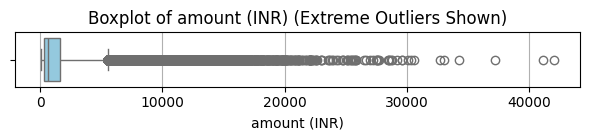

In [148]:
for col in df.select_dtypes(include='number').columns:
    if df[col].nunique() > 2:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        extreme_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        if not extreme_outliers.empty:
            print(f"\n Extreme outliers in '{col}': {len(extreme_outliers)} rows")
            display(extreme_outliers[[col]].sort_values(by=col, ascending=False).head(10))

            plt.figure(figsize=(6, 1.5))
            sns.boxplot(data=df, x=col, whis=3, color='skyblue')
            plt.title(f"Boxplot of {col} (Extreme Outliers Shown)")
            plt.grid(True, axis='x')
            plt.tight_layout()
            plt.show()

There are 8,890 extreme outliers in the amount (INR) column, with some values reaching over 40,000, which is unusually high and may indicate major transactions or, data entry issues, although it doesn't seem like it.

These outliers could distort model training, so they’re worth reviewing or treating during preprocessing.

## **EDA & Visualization**

In [35]:
!pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [149]:
df.drop("transaction id", axis=1, inplace=True)
df.drop("hour_of_day", axis=1, inplace=True)


In [ ]:
# Converting to proper data type and extracting columns
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['date'] = df['timestamp'].dt.date
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute


In [151]:
df['month'] = df['month'].astype('category')
df['day'] = df['day'].astype('category')
df['hour'] = df['hour'].astype('category')
df['minute'] = df['minute'].astype('category')

df['is_weekend'] = df['is_weekend'].replace({0: "No",1:  "Yes"})
df["is_weekend"] = df["is_weekend"].astype('category')

I cleaned up the dataset by dropping columns I didn’t need, like “transaction id” and “hour_of_day.”

Then, I converted the “timestamp” column into a proper datetime format so I could pull out useful parts like year, month, day, hour, and minute. I turned some of these into categorical variables since it makes more sense to treat them as groups instead of numbers.

For the 'is_weekend' column, I swapped the 0s and 1s for “No” and “Yes” to make it easier to understand, and made that a category too. This way, the data is cleaner and ready for analysis.

In [160]:
df.to_csv(PROJECT_ROOT / "data" / "processed" / "cleaned_upi_fraud_dataset.csv", index=False)

### **Categorical Columns Distribution**

C:\Users\sam\AppData\Local\Temp\ipykernel_16068\2386752056.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\sam\AppData\Local\Temp\ipykernel_16068\2386752056.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\sam\AppData\Local\Temp\ipykernel_16068\2386752056.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\sam\AppData\Local\Temp\ipykernel_16068\2386752056.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

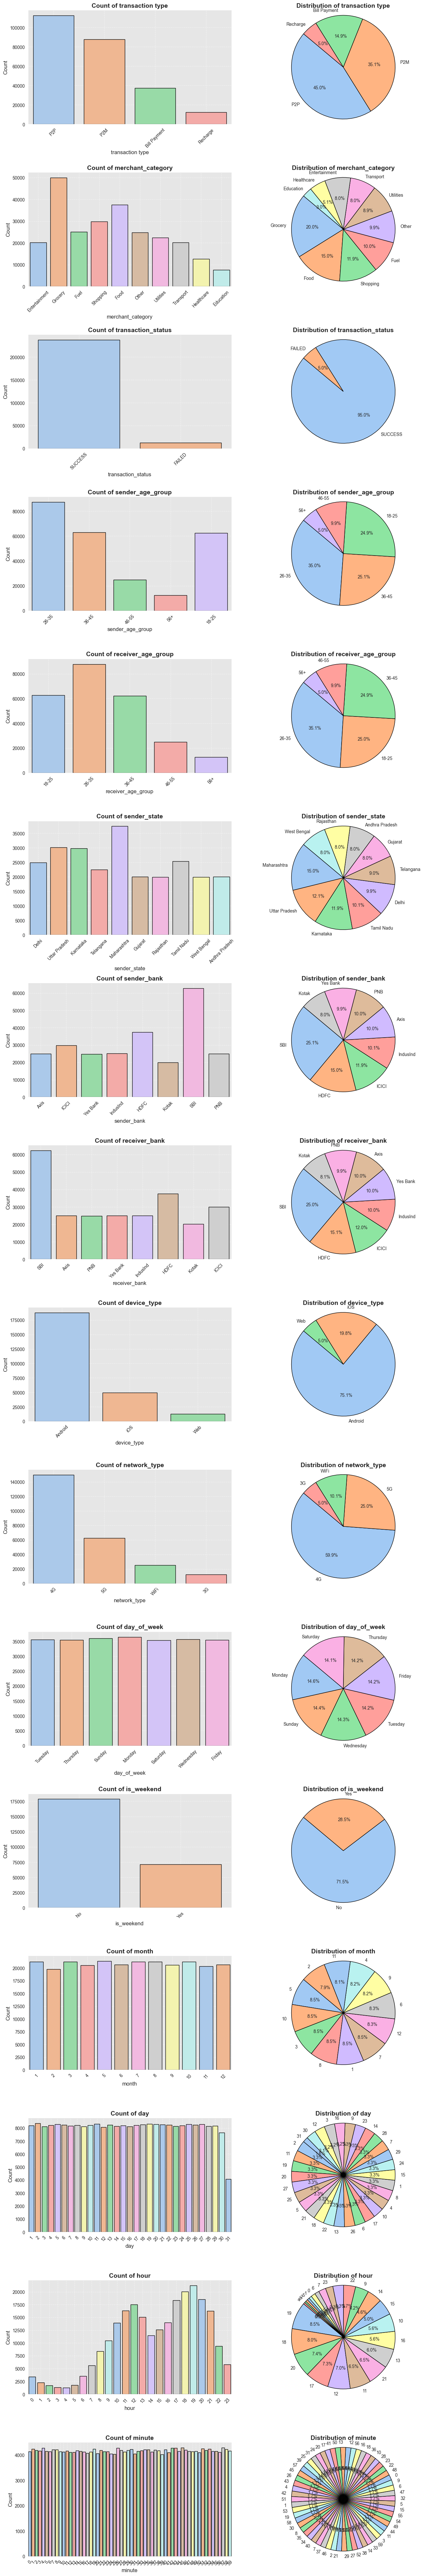

In [152]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols = [col for col in cat_cols if col not in ['timestamp', 'date']]

n = len(cat_cols)
cols = 2
rows = n

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
if rows == 1:
    axes = axes.reshape(1, 2)

for i, col in enumerate(cat_cols):
    # Count plot
    sns.countplot(
        ax=axes[i][0],
        data=df,
        x=col,
        palette='pastel',
        edgecolor='black')
    axes[i][0].set_title(f'Count of {col}', fontsize=14, fontweight='bold')
    axes[i][0].set_xlabel(col, fontsize=12)
    axes[i][0].set_ylabel('Count', fontsize=12)
    axes[i][0].tick_params(axis='x', rotation=45)
    axes[i][0].grid(True, linestyle='--', alpha=0.6)

    # Pie chart
    counts = df[col].value_counts()
    axes[i][1].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel'),
        wedgeprops={'edgecolor': 'black'})
    axes[i][1].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[i][1].axis('equal')

plt.tight_layout()
plt.show()


### **Categorical Columns in relation to  Fraud_flag**

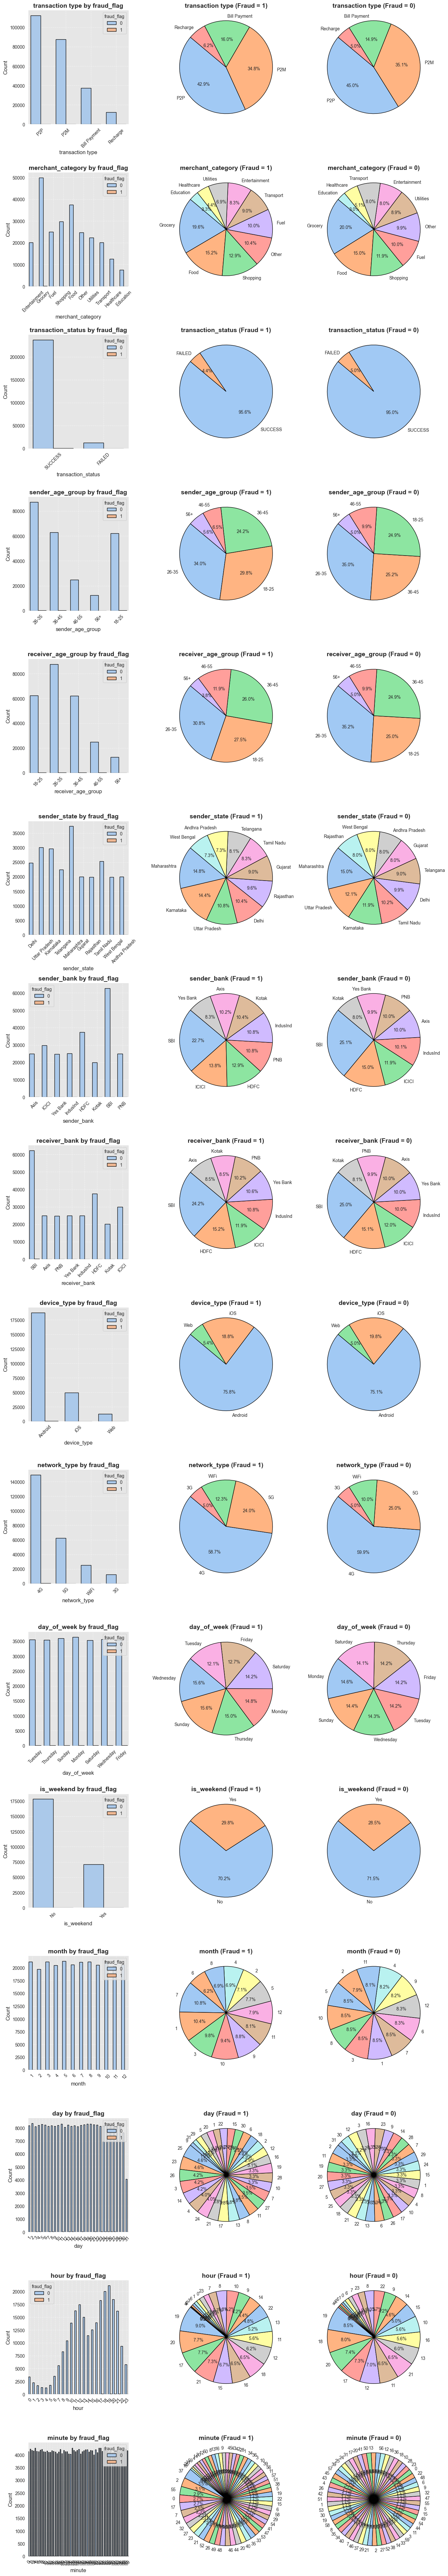

In [153]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols = [col for col in cat_cols if col not in ['timestamp', 'date']]

target_col = 'fraud_flag'

n = len(cat_cols)
cols = 3
rows = n

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
if rows == 1:
    axes = axes.reshape(1, 3)

for i, col in enumerate(cat_cols):
    sns.countplot(
        ax=axes[i][0],
        data=df,
        x=col,
        hue=target_col,
        palette='pastel',
        edgecolor='black')
    axes[i][0].set_title(f'{col} by {target_col}', fontsize=14, fontweight='bold')
    axes[i][0].set_xlabel(col, fontsize=12)
    axes[i][0].set_ylabel('Count', fontsize=12)
    axes[i][0].tick_params(axis='x', rotation=45)
    axes[i][0].grid(True, linestyle='--', alpha=0.6)

    subset = df[df[target_col] == 1][col].value_counts()
    axes[i][1].pie(
        subset,
        labels=subset.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel'),
        wedgeprops={'edgecolor': 'black'})
    axes[i][1].set_title(f'{col} (Fraud = 1)', fontsize=14, fontweight='bold')
    axes[i][1].axis('equal')

    subset = df[df[target_col] == 0][col].value_counts()
    axes[i][2].pie(
        subset,
        labels=subset.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel'),
        wedgeprops={'edgecolor': 'black'})
    axes[i][2].set_title(f'{col} (Fraud = 0)', fontsize=14, fontweight='bold')
    axes[i][2].axis('equal')

plt.tight_layout()
plt.show()

### **CHI-Squared and Cramer's V**

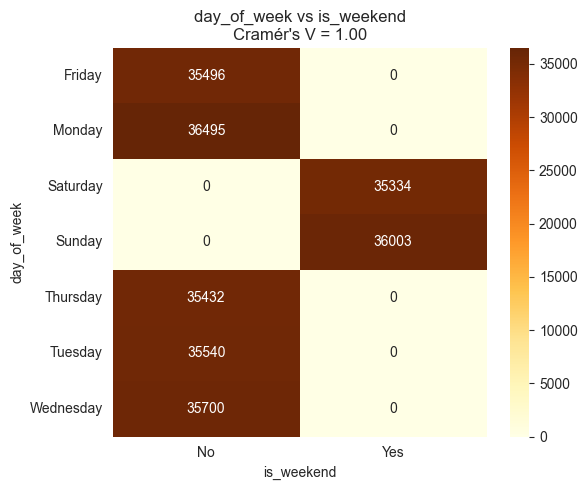

In [154]:
def visualize_strong_categorical_relationships(df, cat_cols, threshold=0.3):
    from scipy.stats import chi2_contingency

    n = len(cat_cols)
    strong_pairs = []

    def cramers_v(confusion_matrix):
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        r_corr = r - ((r-1)**2)/(n-1)
        k_corr = k - ((k-1)**2)/(n-1)
        return (phi2_corr / min((k_corr-1), (r_corr-1)))**0.5

    for i in range(n):
        for j in range(i+1, n):
            ct = pd.crosstab(df[cat_cols[i]], df[cat_cols[j]])
            v = cramers_v(ct)
            if v >= threshold:
                strong_pairs.append((cat_cols[i], cat_cols[j], v))

    if not strong_pairs:
        print("No strong relationships found.")
        return

    fig, axes = plt.subplots(1, len(strong_pairs), figsize=(6 * len(strong_pairs), 5))

    if len(strong_pairs) == 1:
        axes = [axes]

    for ax, (col1, col2, v) in zip(axes, strong_pairs):
        sns.heatmap(pd.crosstab(df[col1], df[col2]), annot=True, fmt='d', cmap='YlOrBr', ax=ax)
        ax.set_title(f'{col1} vs {col2}\nCramér\'s V = {v:.2f}')

    plt.tight_layout()
    plt.show()

visualize_strong_categorical_relationships(df, cat_cols)

There is no strong correlation between categorical columns in our dataset.

### **Numerical Columns Distribution**

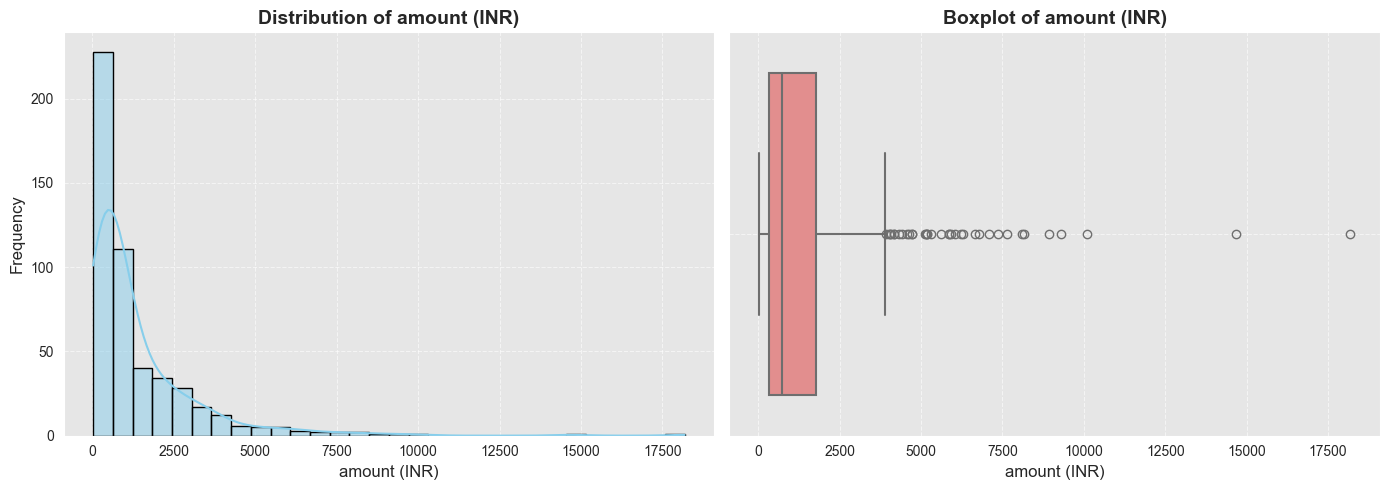

In [155]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

df_sample = df.sample(n=500, random_state=42) if len(df) > 500 else df

num_cols = df_sample.select_dtypes(include=['number']).columns
num_cols = [col for col in num_cols if col not in ['fraud_flag', 'year']]

n = len(num_cols)
cols = 2
rows = n

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
if rows == 1:
    axes = axes.reshape(1, 2)

for i, col in enumerate(num_cols):
    sns.histplot(
        ax=axes[i][0],
        data=df_sample,
        x=col,
        bins=30,
        kde=True,
        color='skyblue',
        edgecolor='black'
    )
    axes[i][0].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[i][0].set_xlabel(col, fontsize=12)
    axes[i][0].set_ylabel('Frequency', fontsize=12)
    axes[i][0].grid(True, linestyle='--', alpha=0.6)

    sns.boxplot(
        ax=axes[i][1],
        data=df_sample,
        x=col,
        color='lightcoral',
        linewidth=1.5
    )
    axes[i][1].set_title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
    axes[i][1].set_xlabel(col, fontsize=12)
    axes[i][1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### **Numerical Columns in relation to Fraud_flag**

C:\Users\sam\AppData\Local\Temp\ipykernel_16068\1204345600.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=target_col, y=amount_col, data=df_copy, palette='pastel', ax=axes[0])
C:\Users\sam\AppData\Local\Temp\ipykernel_16068\1204345600.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=target_col, y='log_amount', data=df_copy, palette='pastel', ax=axes[1])


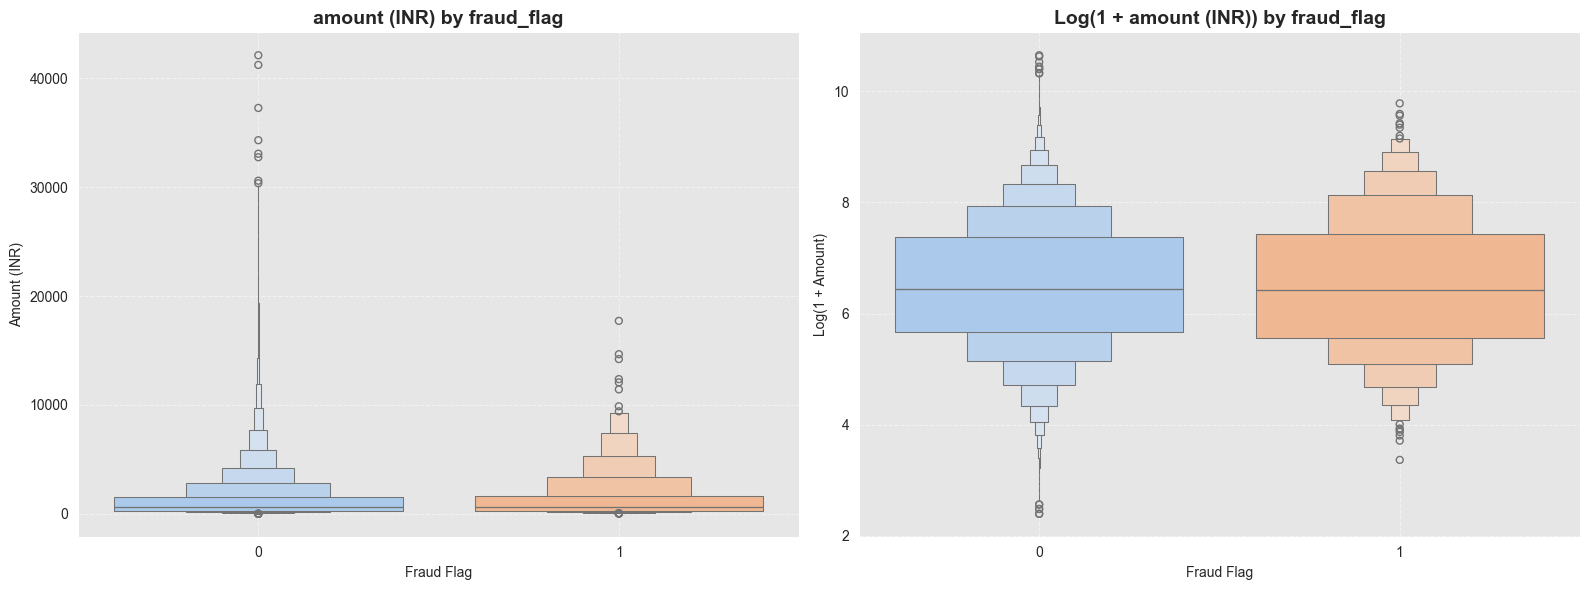

In [156]:
def visualize_amount_distributions(df, amount_col='amount (INR)', target_col='fraud_flag'):
    df_copy = df.copy()
    df_copy['log_amount'] = np.log1p(df[amount_col]) 

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.boxenplot(x=target_col, y=amount_col, data=df_copy, palette='pastel', ax=axes[0])
    axes[0].set_title(f'{amount_col} by {target_col}', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Fraud Flag')
    axes[0].set_ylabel('Amount (INR)')
    axes[0].grid(True, linestyle='--', alpha=0.5)

    sns.boxenplot(x=target_col, y='log_amount', data=df_copy, palette='pastel', ax=axes[1])
    axes[1].set_title(f'Log(1 + {amount_col}) by {target_col}', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Fraud Flag')
    axes[1].set_ylabel('Log(1 + Amount)')
    axes[1].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

visualize_amount_distributions(df)

We notice Amount doesn't have any strong correlation to frauds!

### **Amount and Categorical Columns**

C:\Users\sam\AppData\Local\Temp\ipykernel_16068\2251288679.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=col, y=amount_col, data=df, palette='pastel', ax=ax)
C:\Users\sam\AppData\Local\Temp\ipykernel_16068\2251288679.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\sam\AppData\Local\Temp\ipykernel_16068\2251288679.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=col, y=amount_col, data=df, palette='pastel', ax=ax)
C:\Users\sam\AppData\Local\Temp\ipykernel_16068\2251288679.py:19: UserWarning: set_ticklabels() sh

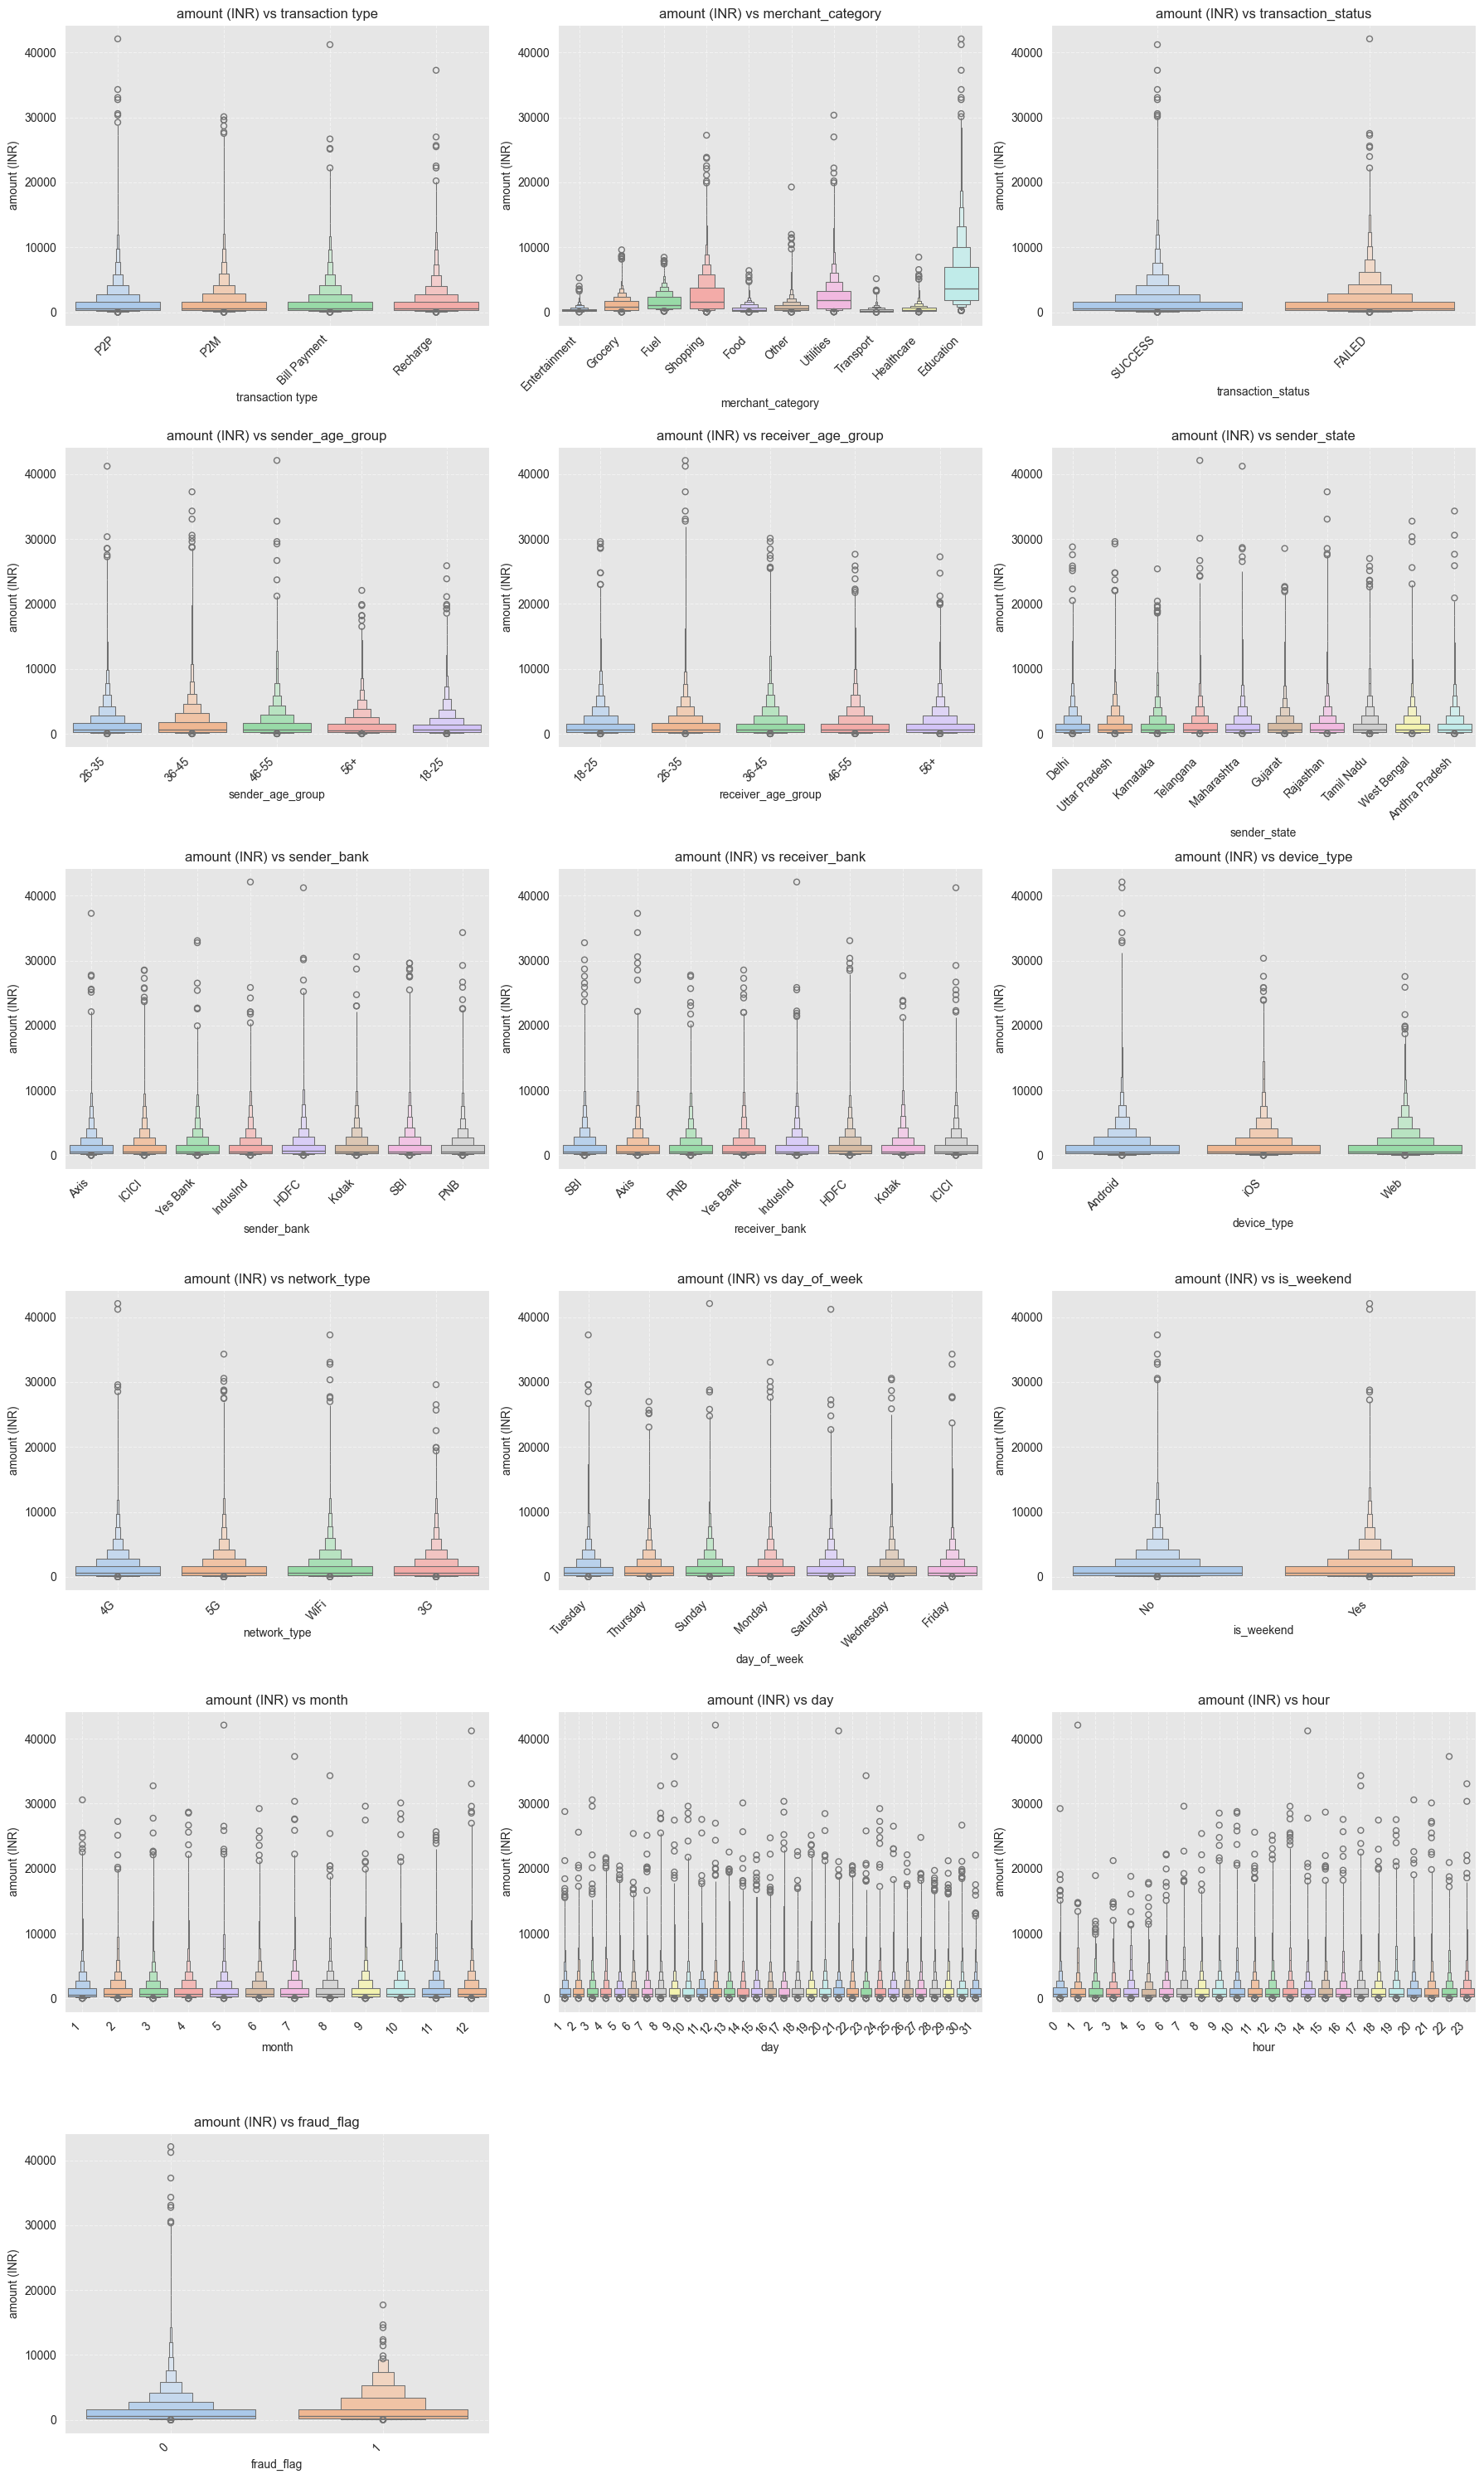

In [157]:
def visualize_all_features_vs_amount(df, amount_col='amount (INR)', max_cols=3):
    df = df.copy()
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    cat_cols = [col for col in cat_cols if col not in ['timestamp', 'date', 'minute']]
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    num_cols = [col for col in num_cols if col not in ['amount (INR)' , 'year']]

    features = cat_cols + num_cols
    n = len(features)
    rows = (n + max_cols - 1) // max_cols

    fig, axes = plt.subplots(rows, max_cols, figsize=(6 * max_cols, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(features):
        ax = axes[i]
        if df[col].nunique() <= 20 or df[col].dtype in ['object', 'category']:
            sns.boxenplot(x=col, y=amount_col, data=df, palette='pastel', ax=ax)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        else:
            sns.scatterplot(x=col, y=amount_col, data=df, ax=ax, alpha=0.5)

        ax.set_title(f'{amount_col} vs {col}', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.5)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

visualize_all_features_vs_amount(df)

### **Time Series Analysis**

C:\Users\sam\AppData\Local\Temp\ipykernel_16068\917584093.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack().fillna(0)
C:\Users\sam\AppData\Local\Temp\ipykernel_16068\917584093.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_amount = df.groupby('hour')['amount (INR)'].mean()


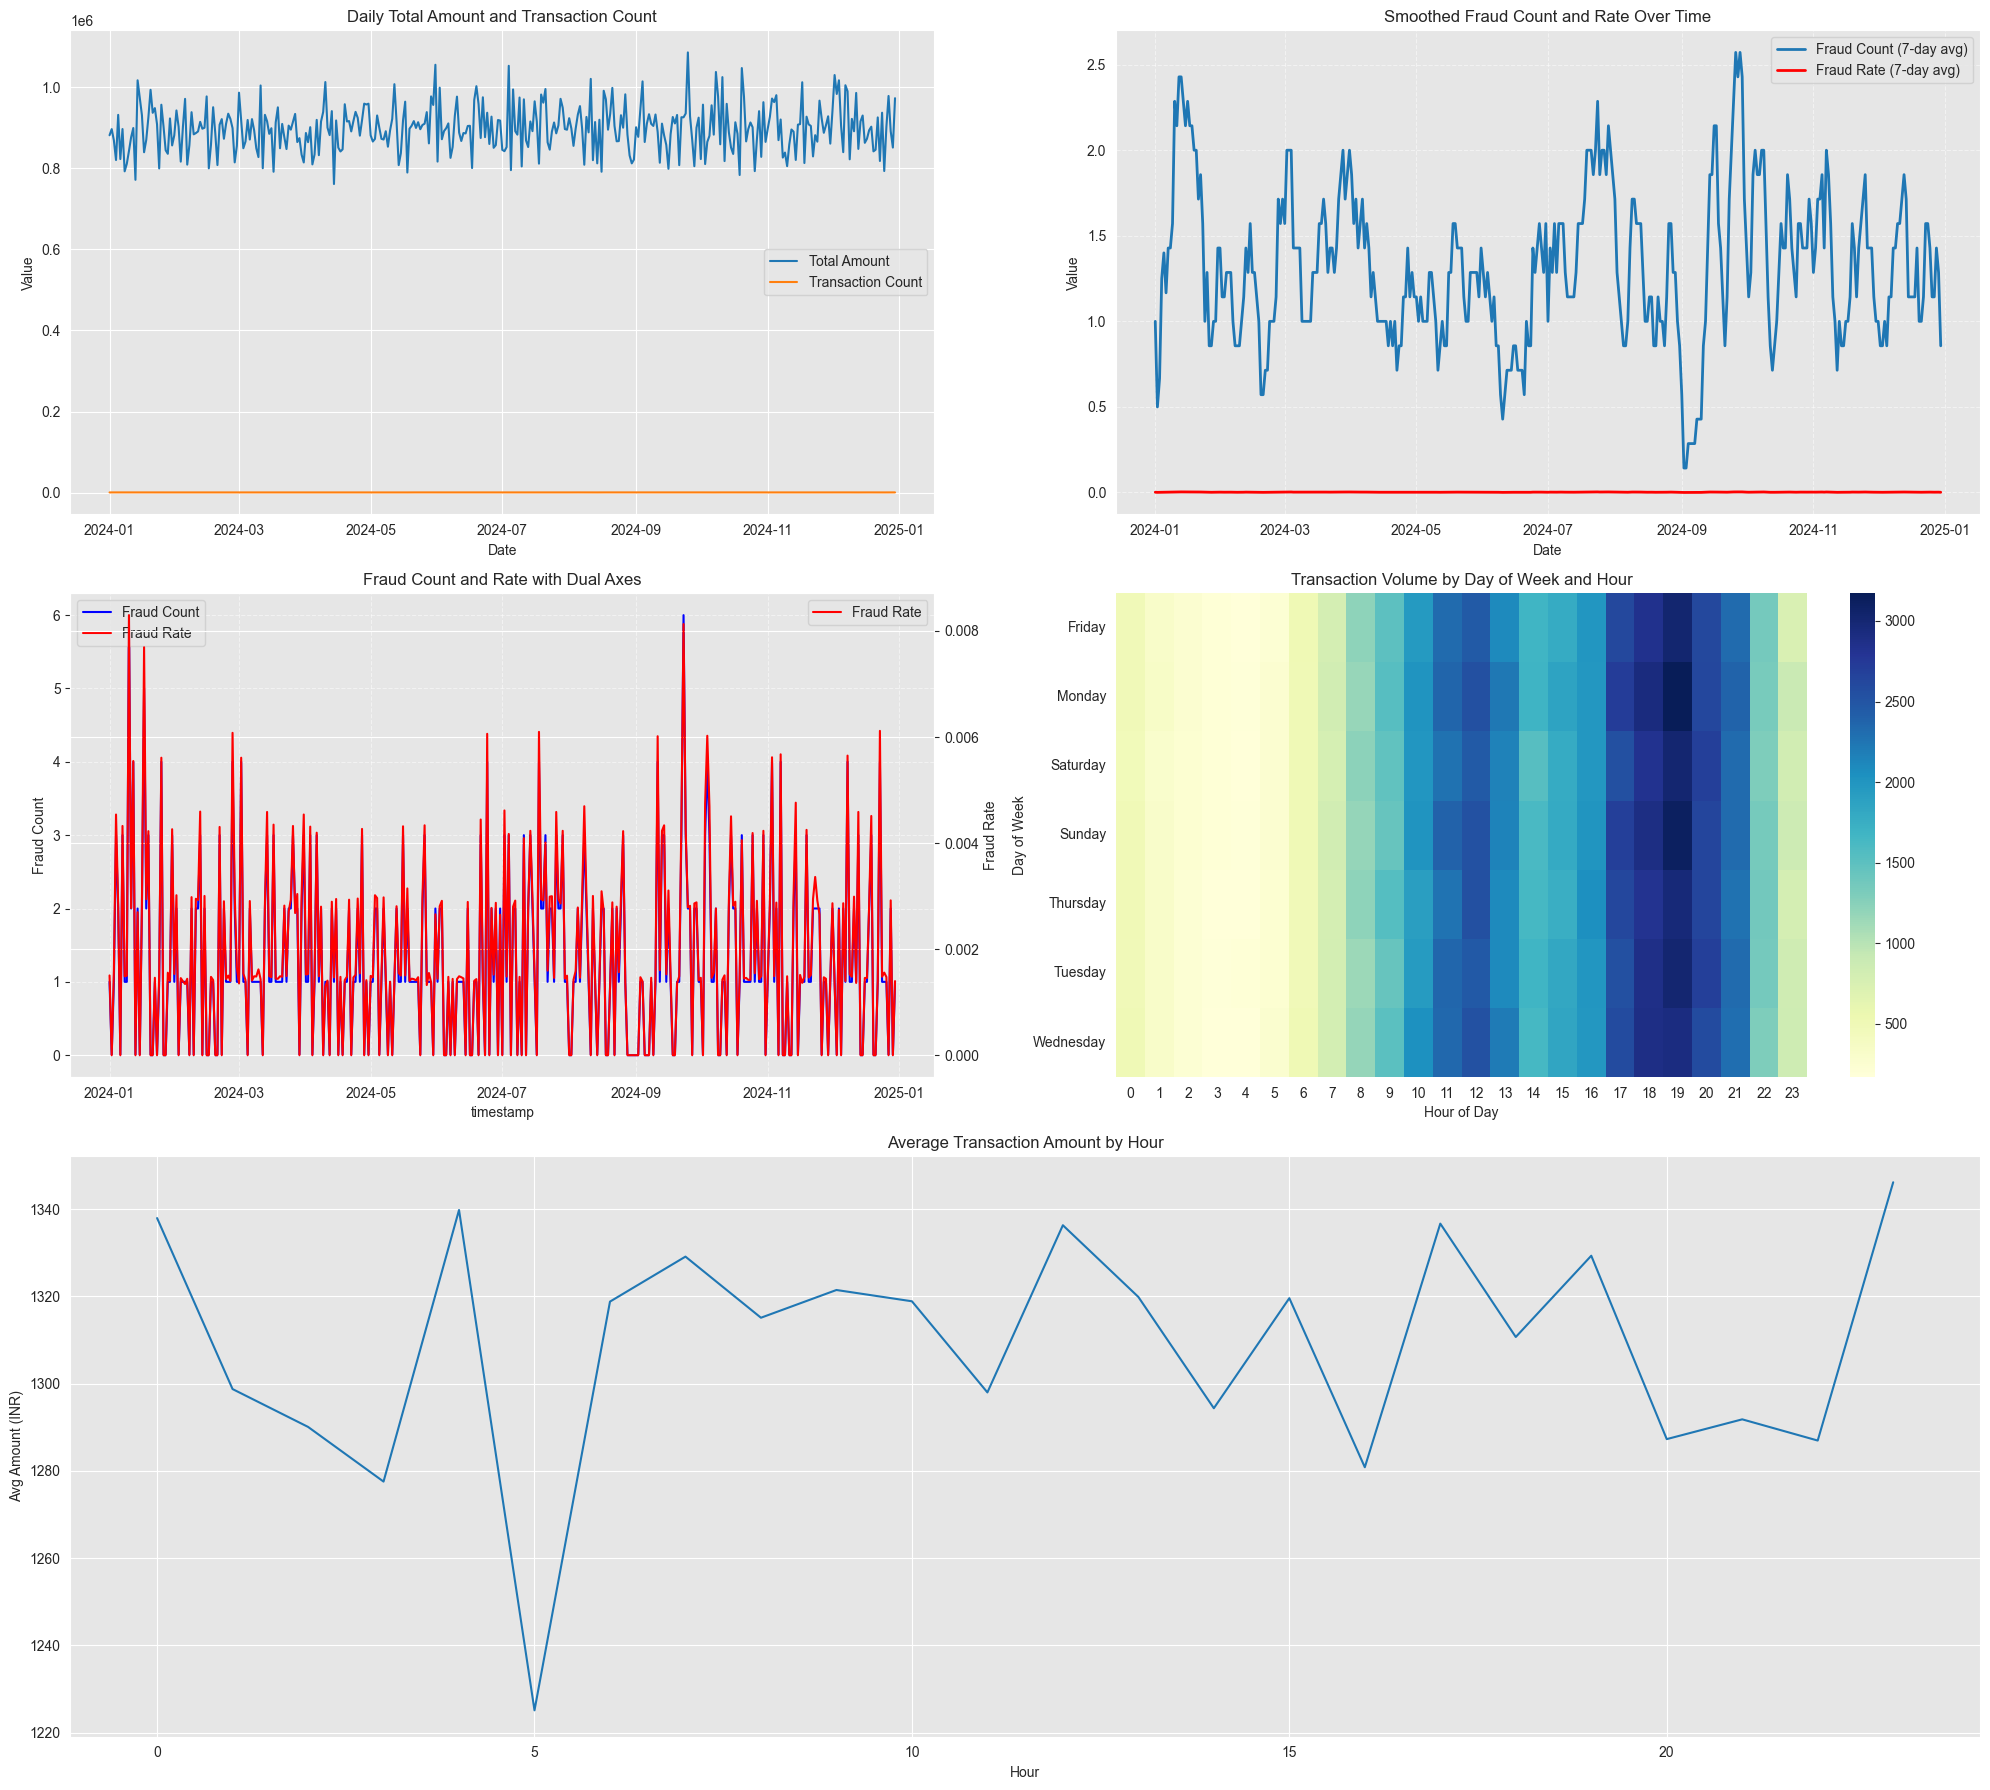

In [158]:
import matplotlib.gridspec as gridspec

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])
df['fraud_flag'] = df['fraud_flag'].astype(int)
df_ts = df.set_index('timestamp')

daily = df_ts.resample('D').agg({
    'amount (INR)': ['sum', 'mean', 'count'],
    'fraud_flag': 'sum'})
daily.columns = ['total_amount', 'avg_amount', 'transaction_count', 'fraud_count']
daily['fraud_rate'] = daily['fraud_count'] / daily['transaction_count']
daily['fraud_count_smooth'] = daily['fraud_count'].rolling(window=7, min_periods=1).mean()
daily['fraud_rate_smooth'] = daily['fraud_rate'].rolling(window=7, min_periods=1).mean()

heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack().fillna(0)
hourly_amount = df.groupby('hour')['amount (INR)'].mean()

fig = plt.figure(figsize=(20, 18))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1.2])

ax1 = fig.add_subplot(gs[0, 0])
sns.lineplot(data=daily['total_amount'], label='Total Amount', ax=ax1)
sns.lineplot(data=daily['transaction_count'], label='Transaction Count', ax=ax1)
ax1.set_title('Daily Total Amount and Transaction Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.grid(True)
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
sns.lineplot(data=daily['fraud_count_smooth'], label='Fraud Count (7-day avg)', linewidth=2, ax=ax2)
sns.lineplot(data=daily['fraud_rate_smooth'], label='Fraud Rate (7-day avg)', color='red', linewidth=2, ax=ax2)
ax2.set_title('Smoothed Fraud Count and Rate Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend()

ax3 = fig.add_subplot(gs[1, 0])
ax4 = ax3.twinx()
sns.lineplot(data=daily['fraud_count'], label='Fraud Count', color='blue', ax=ax3)
sns.lineplot(data=daily['fraud_rate'], label='Fraud Rate', color='red', ax=ax4)
ax3.set_ylabel('Fraud Count')
ax4.set_ylabel('Fraud Rate')
ax3.set_title('Fraud Count and Rate with Dual Axes')
ax3.grid(True, linestyle='--', alpha=0.5)
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

ax5 = fig.add_subplot(gs[1, 1])
sns.heatmap(heatmap_data, cmap='YlGnBu', ax=ax5)
ax5.set_title('Transaction Volume by Day of Week and Hour')
ax5.set_xlabel('Hour of Day')
ax5.set_ylabel('Day of Week')

ax6 = fig.add_subplot(gs[2, :])
sns.lineplot(x=hourly_amount.index, y=hourly_amount.values, ax=ax6)
ax6.set_title('Average Transaction Amount by Hour')
ax6.set_xlabel('Hour')
ax6.set_ylabel('Avg Amount (INR)')
ax6.grid(True)

plt.tight_layout()
plt.show()

In [108]:
!pip install scikit-learn

  Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached scipy-1.16.3-cp311-cp311-win_amd64.whl (38.7 MB)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [115]:
!pip install xgboost

  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.2-py3-none-win_amd64.whl (72.0 MB)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
